In [71]:
df = df.iloc[0:0]
import pandas as pd
from pandas_datareader import wb
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000
# Define the data you want to download
indicators = ['SI.POV.GINI'] # Gini coefficient, GDP per capita, Employment rate, Education level
country = ['US', 'CN', 'JP'] # United States, China, Japan
start = '1960-01-01'
end = '2020-12-31'

# Download the data from World Bank
df = wb.download(indicator=indicators, country= 'all', start=start, end=end)

# Sort the data by country
df = df.reset_index().sort_values('country').set_index('country')

# Pivot the data so that years are in columns and countries are in rows
df = df.pivot(columns='year')

# Rename the columns using the indicators and years
columns = [f'{year}_{col}'.format(col, year) for year in df.columns for col in indicators]

# Reset the index to turn countries into a column
df = df.reset_index()
df.rename(columns={'SI.POV.GINI': 'Gini coefficient','NY.GDP.PCAP.CD':'GDP per capita', 'SL.UEM.TOTL.ZS':'Employment rate', 'SE.PRM.ENRR': 'Education level','NY.GDP.TOTL.RT.ZS':'Resources rent' }, inplace= True)


df.columns = ['{} {}'.format(col[0], col[1]) for col in df.columns]

df.rename(columns = {'countryYear': 'Country'})
import country_converter as coco
import pandas as pd
# Add a new column for country codes
df['Country Code'] = coco.convert(names=df['country '], to='ISO3')
df=df.where(df['Country Code'] != "not found")
for i in range(len(list(df.columns))):
    print(df[list(df.columns)[i]].isna().sum(),list(df.columns)[i] )

Africa Eastern and Southern not found in regex
Africa Western and Central not found in regex
Arab World not found in regex
Caribbean small states not found in regex
Central Europe and the Baltics not found in regex
Channel Islands not found in regex
Early-demographic dividend not found in regex
East Asia & Pacific not found in regex
East Asia & Pacific (IDA & IBRD countries) not found in regex
East Asia & Pacific ( not found in regex
Euro area not found in regex
Europe & Central Asia not found in regex
Europe & Central Asia (IDA & IBRD countries) not found in regex
Europe & Central Asia ( not found in regex
European Union not found in regex
Fragile and conflict affected situations not found in regex
Heavily indebted poor countries (HIPC) not found in regex
High income not found in regex
IBRD only not found in regex
IDA & IBRD total not found in regex
IDA blend not found in regex
IDA only not found in regex
IDA total not found in regex
Late-demographic dividend not found in regex
Latin 

50 country 
266 Gini coefficient 1960
266 Gini coefficient 1961
266 Gini coefficient 1962
266 Gini coefficient 1963
266 Gini coefficient 1964
266 Gini coefficient 1965
266 Gini coefficient 1966
265 Gini coefficient 1967
266 Gini coefficient 1968
265 Gini coefficient 1969
266 Gini coefficient 1970
265 Gini coefficient 1971
266 Gini coefficient 1972
266 Gini coefficient 1973
264 Gini coefficient 1974
264 Gini coefficient 1975
266 Gini coefficient 1976
265 Gini coefficient 1977
265 Gini coefficient 1978
261 Gini coefficient 1979
263 Gini coefficient 1980
259 Gini coefficient 1981
264 Gini coefficient 1982
262 Gini coefficient 1983
261 Gini coefficient 1984
255 Gini coefficient 1985
252 Gini coefficient 1986
246 Gini coefficient 1987
257 Gini coefficient 1988
253 Gini coefficient 1989
249 Gini coefficient 1990
247 Gini coefficient 1991
235 Gini coefficient 1992
244 Gini coefficient 1993
240 Gini coefficient 1994
230 Gini coefficient 1995
235 Gini coefficient 1996
238 Gini coefficient 1997


In [91]:
import numpy as np
df = df.apply(lambda row: row.ffill().bfill(), axis=1)
cols = list(df.columns)

# Перемещаем последнюю колонку в начало списка
cols = [cols[-1]] + cols[:-1]

# Используем новый порядок колонок для создания нового DataFrame
df = df[cols]

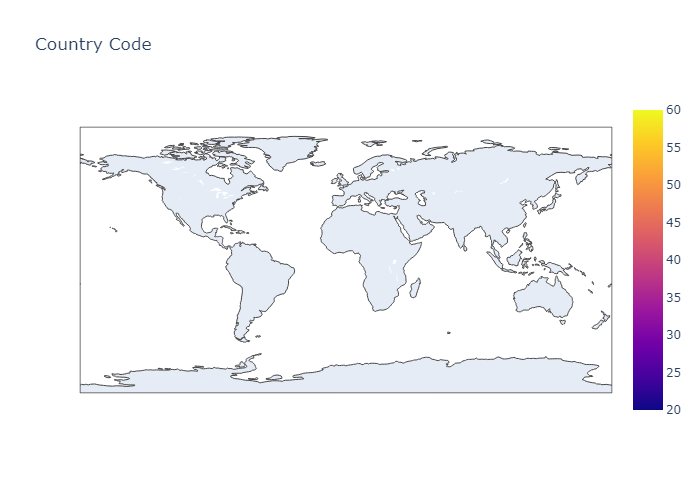

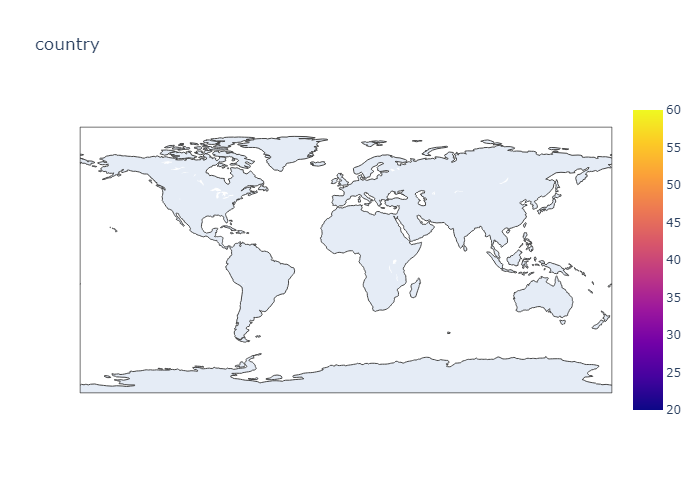

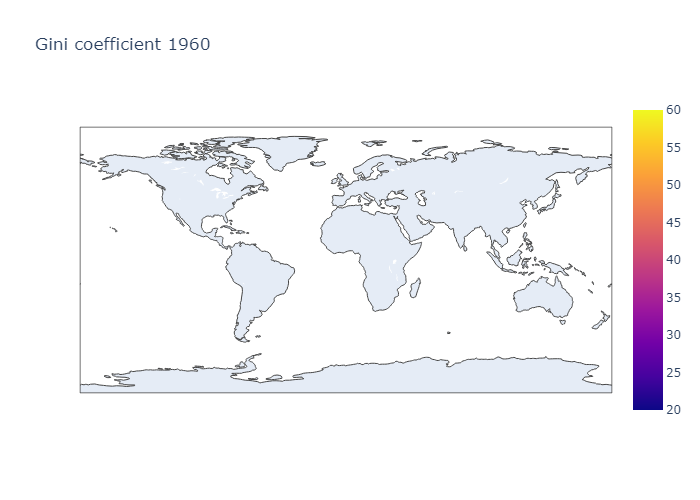

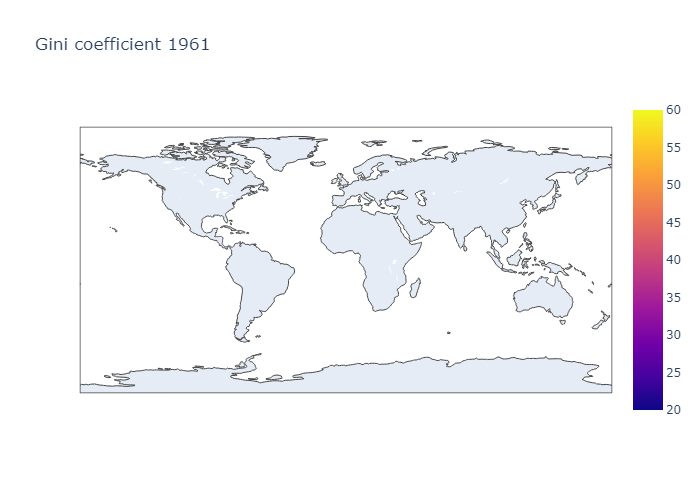

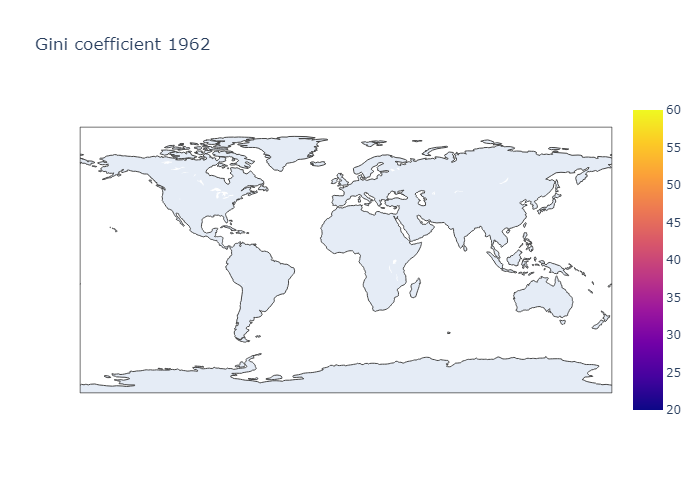

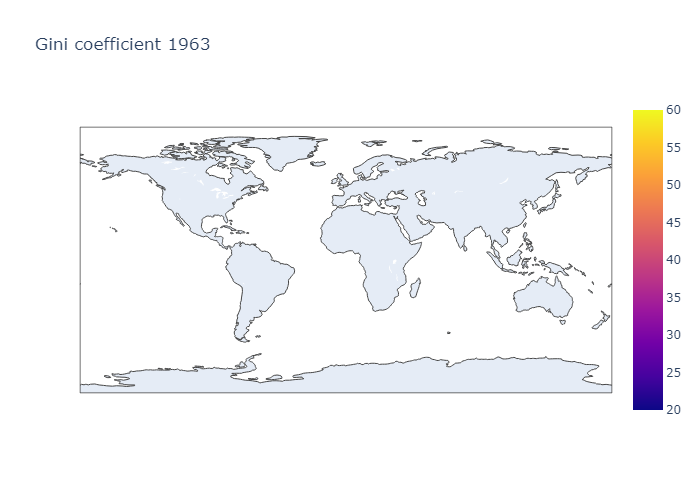

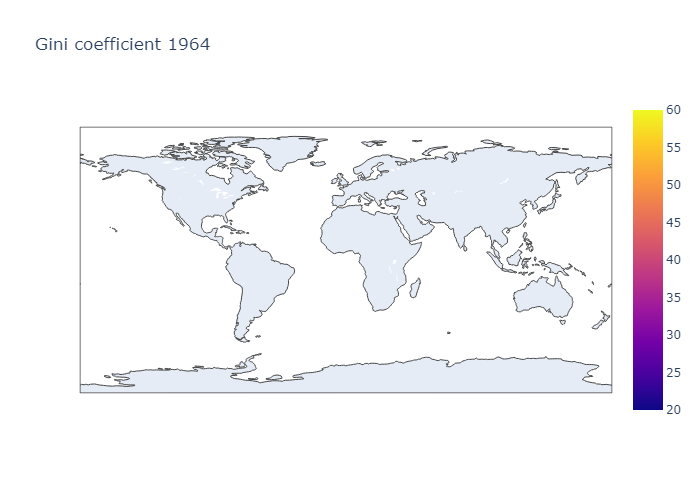

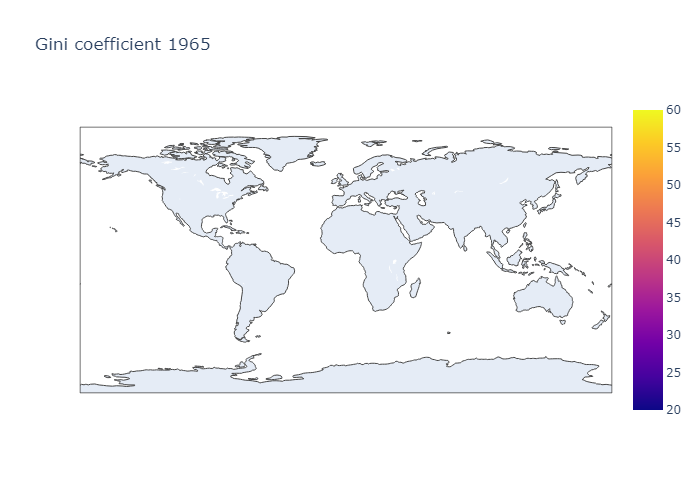

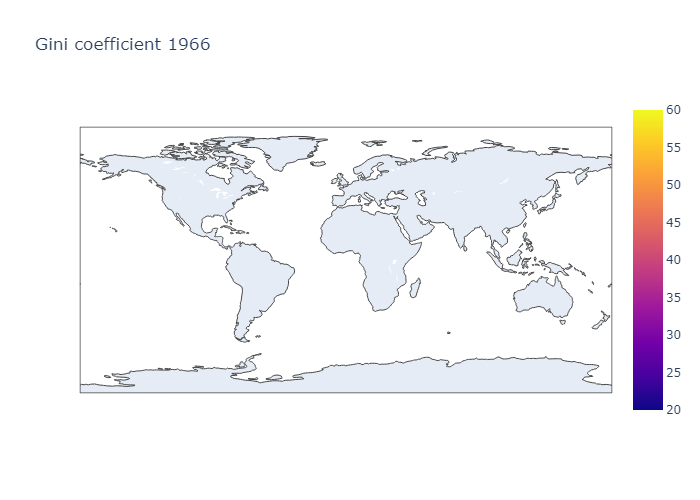

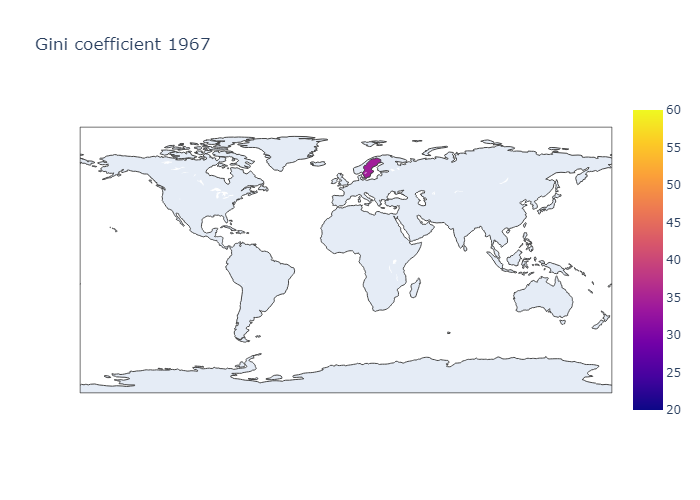

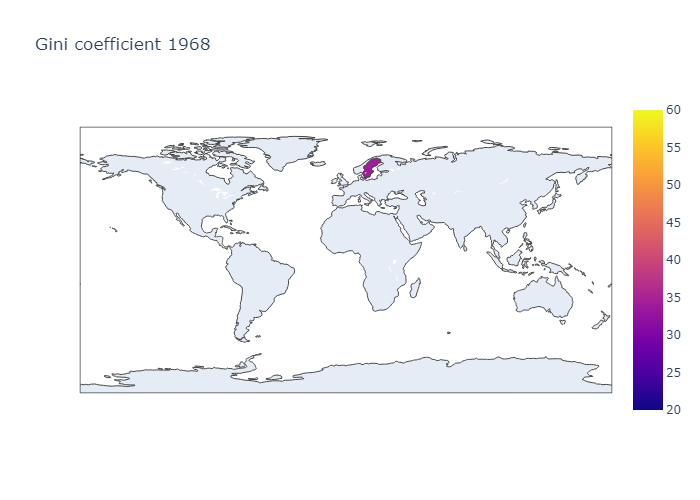

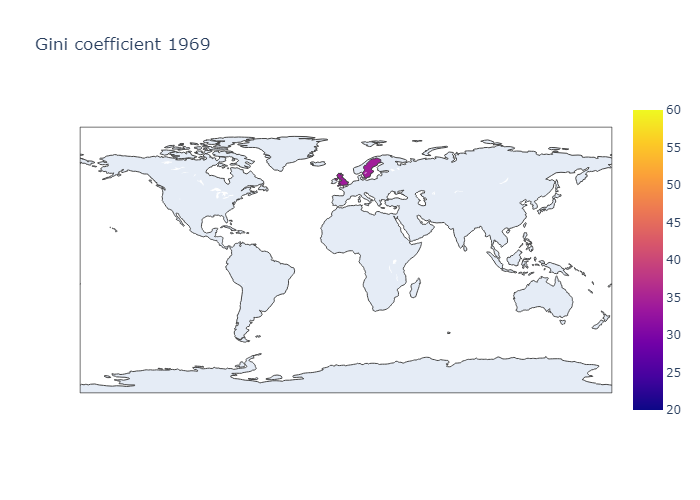

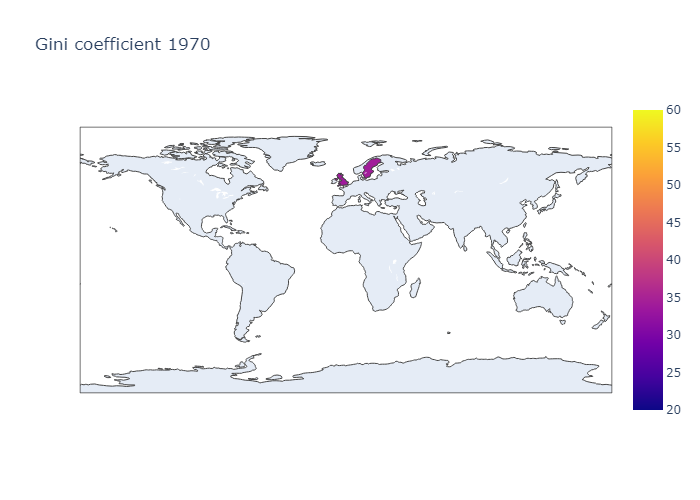

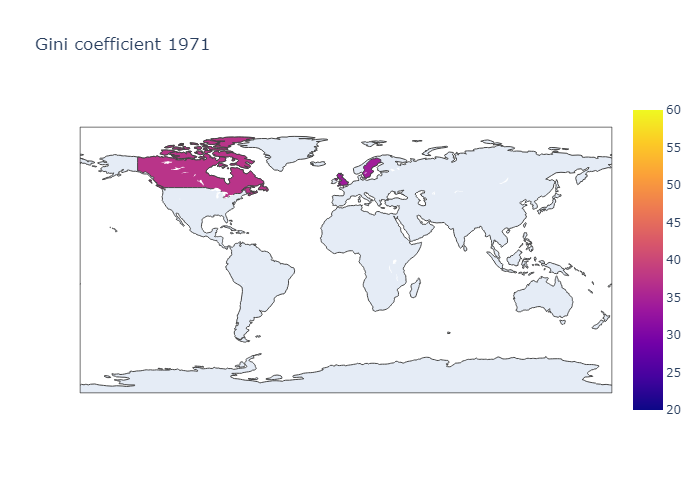

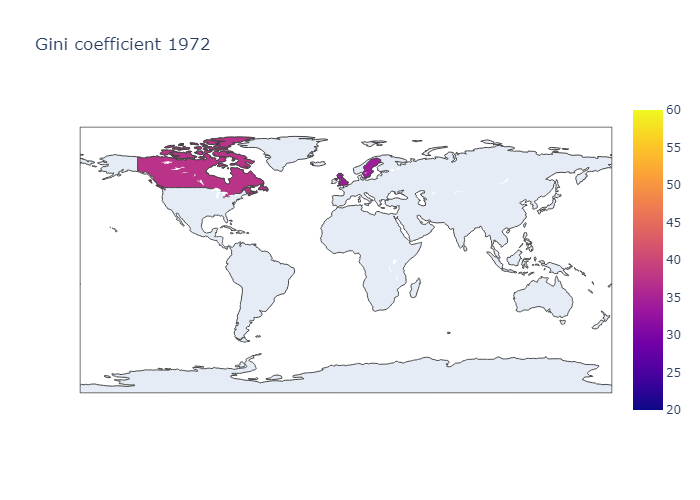

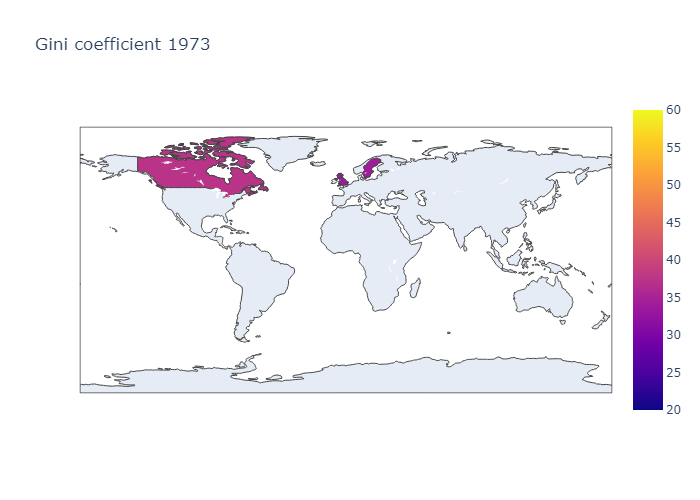

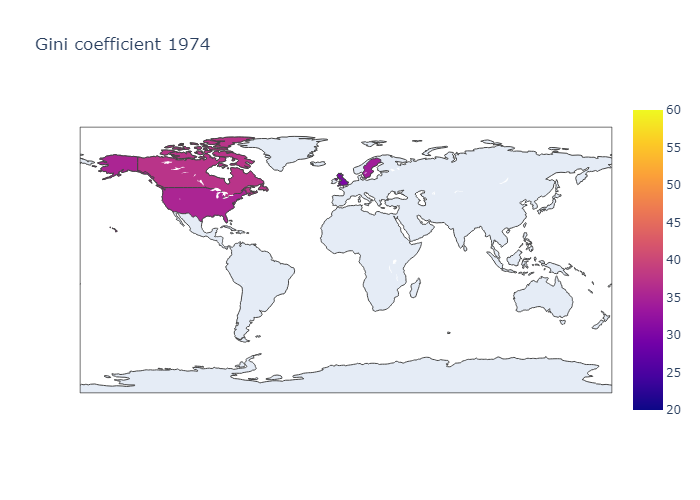

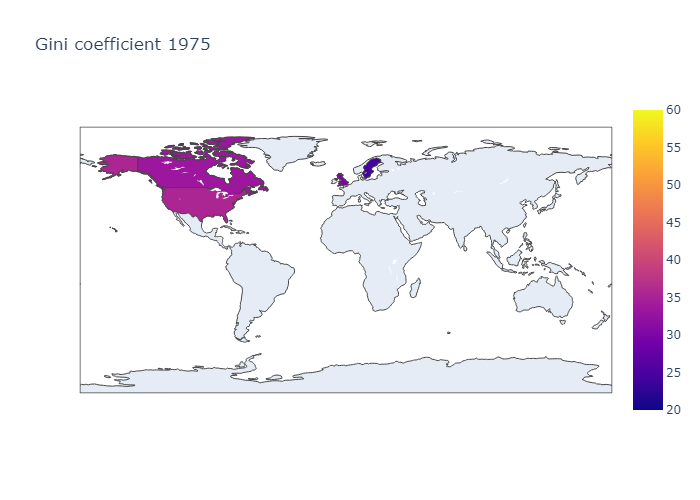

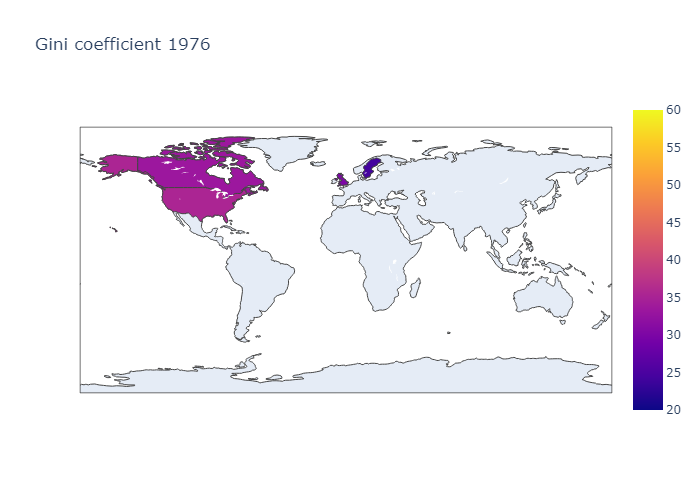

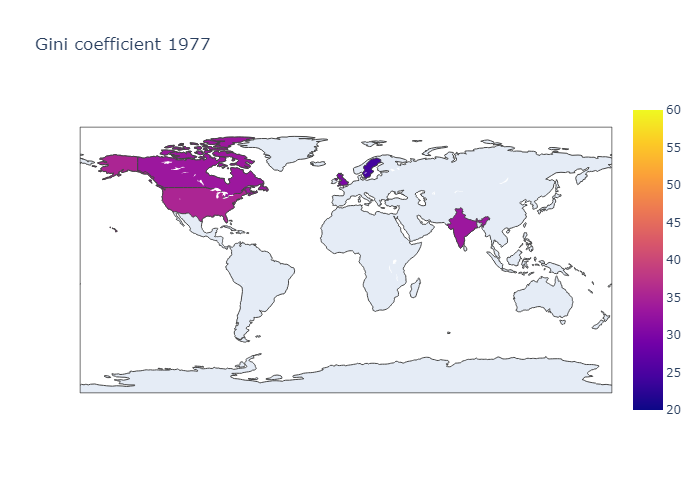

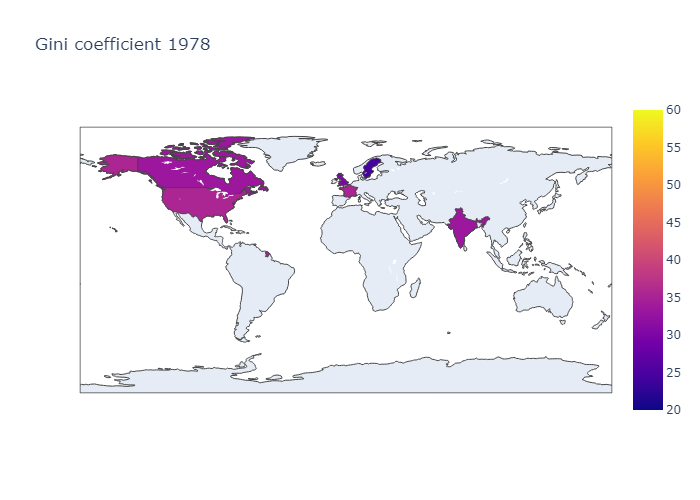

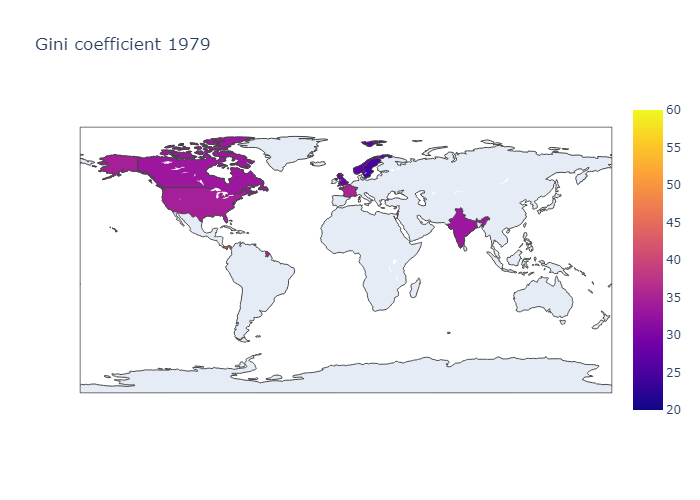

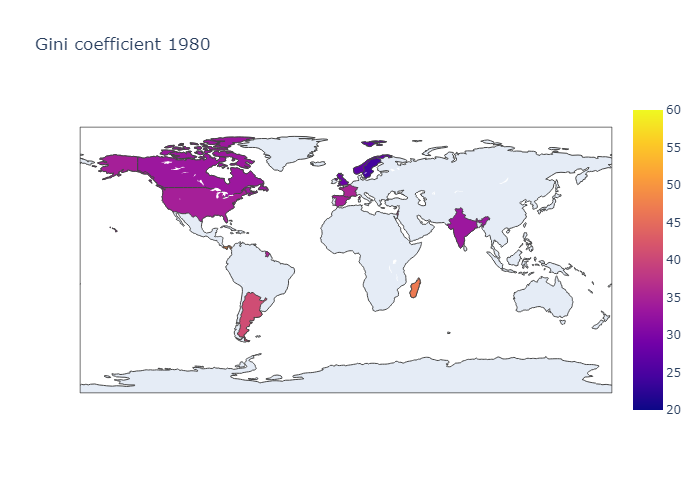

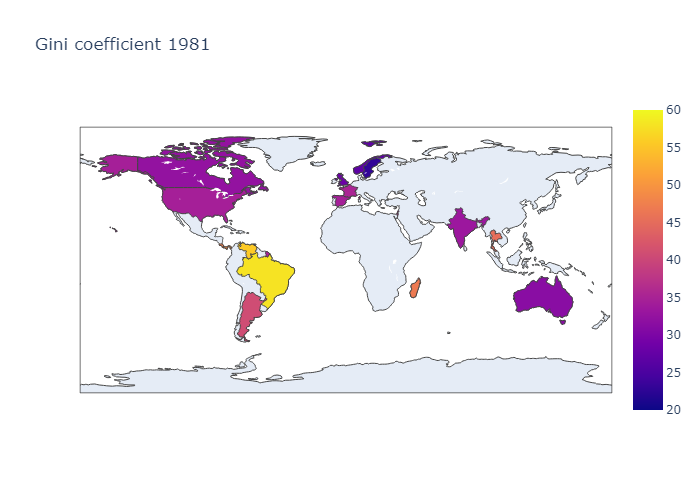

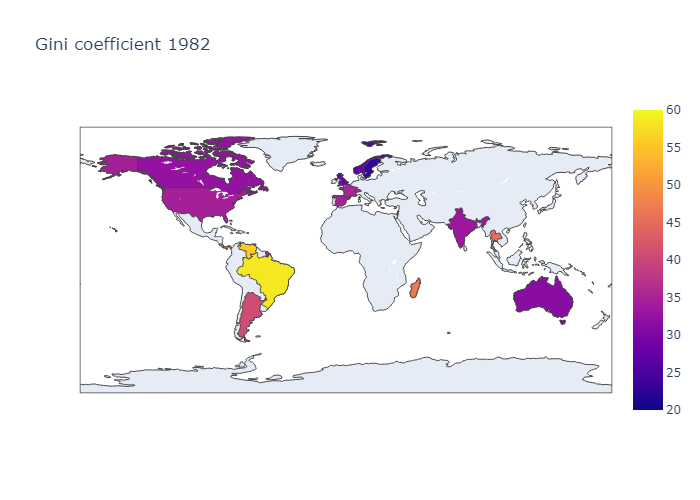

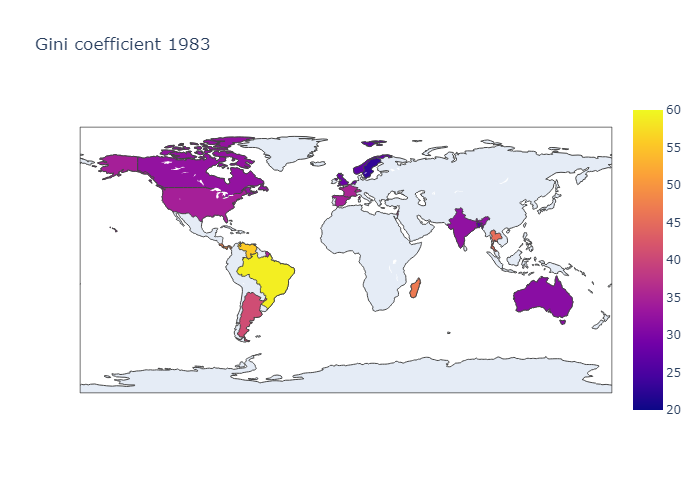

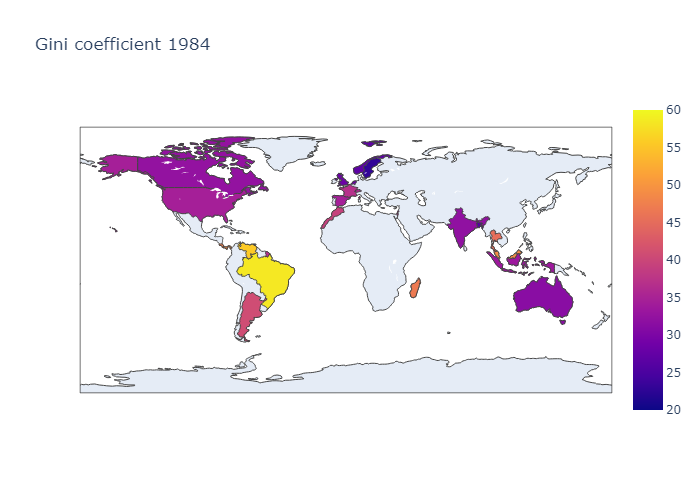

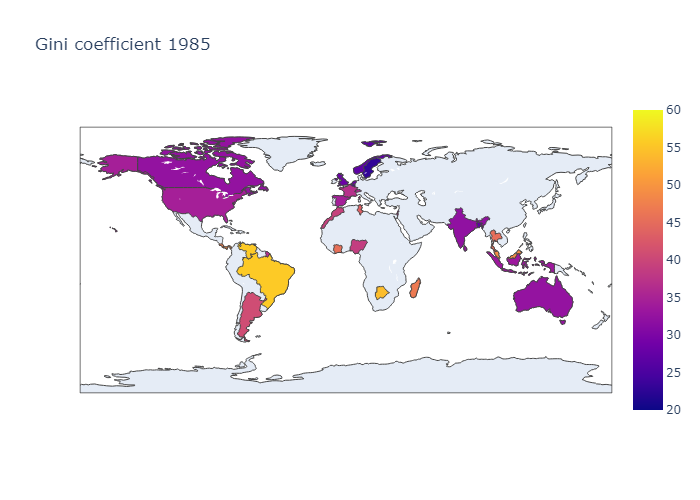

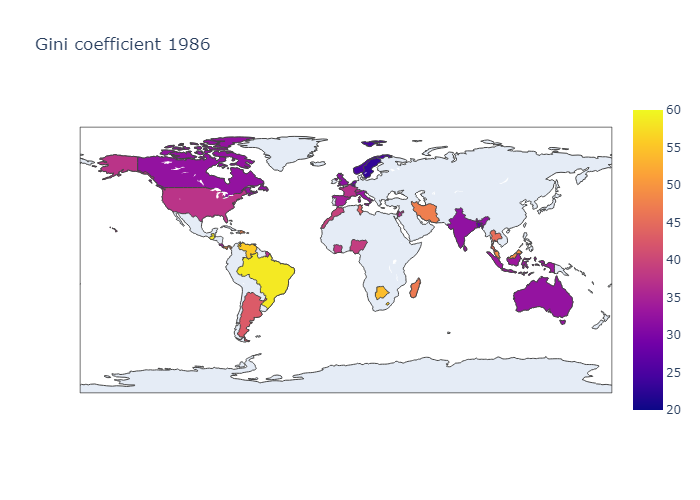

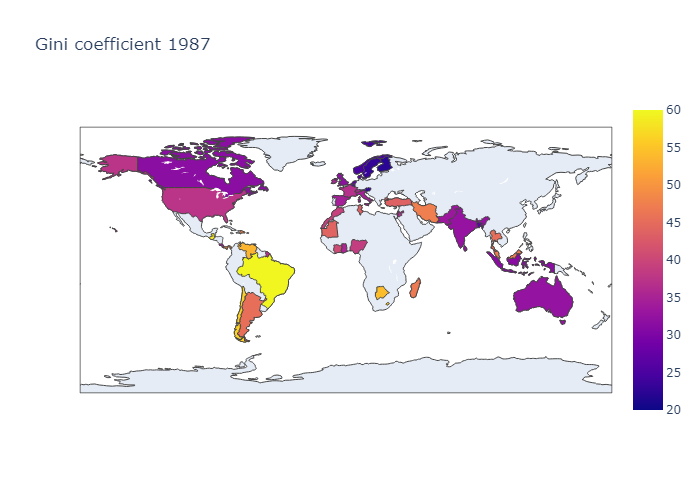

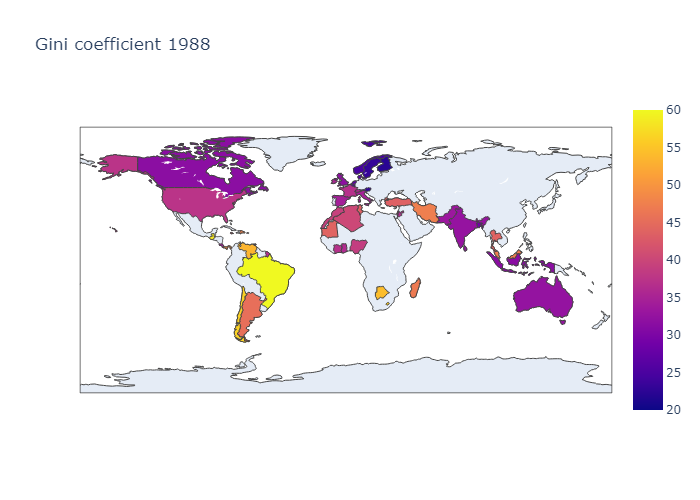

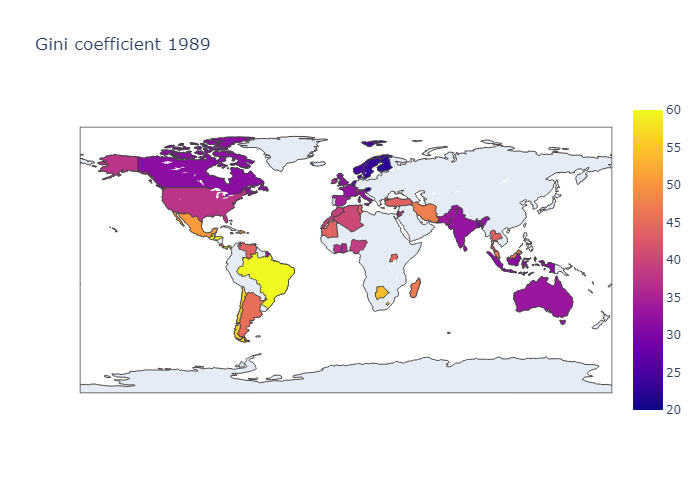

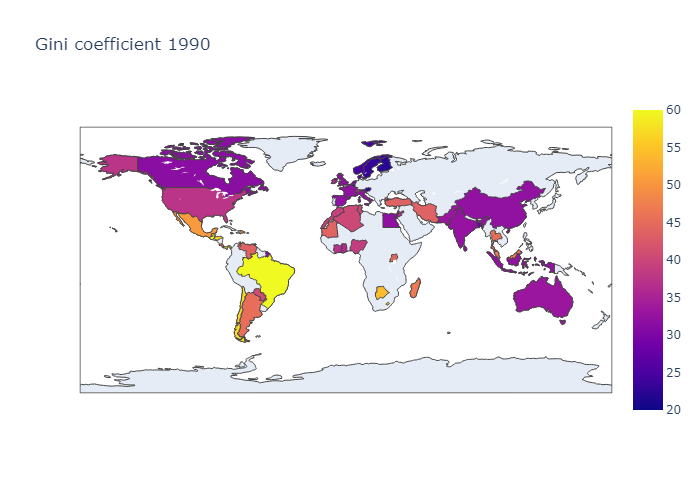

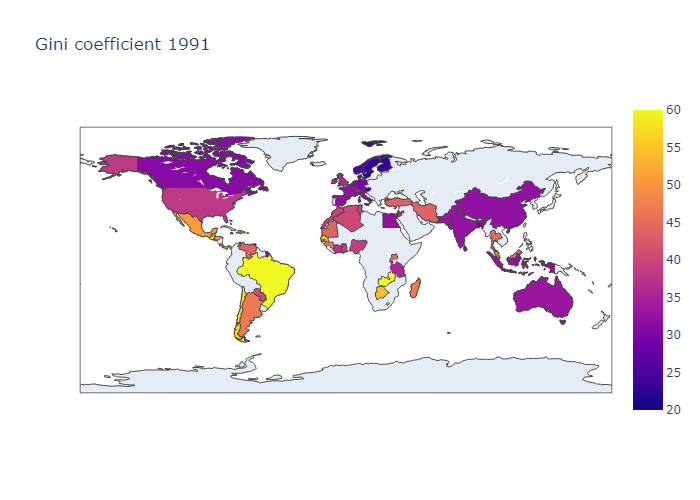

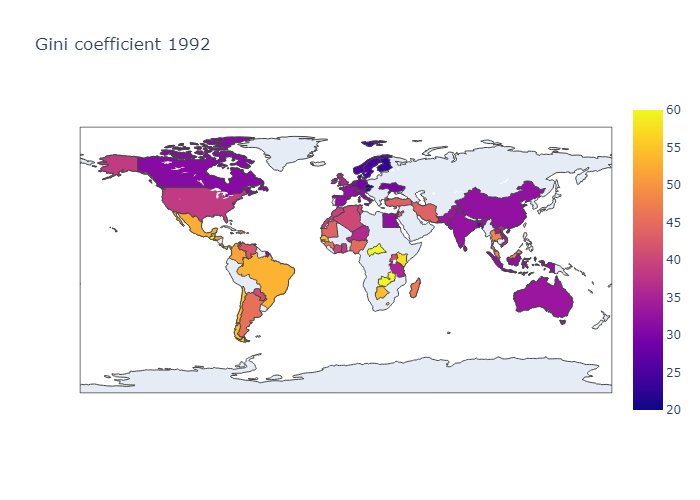

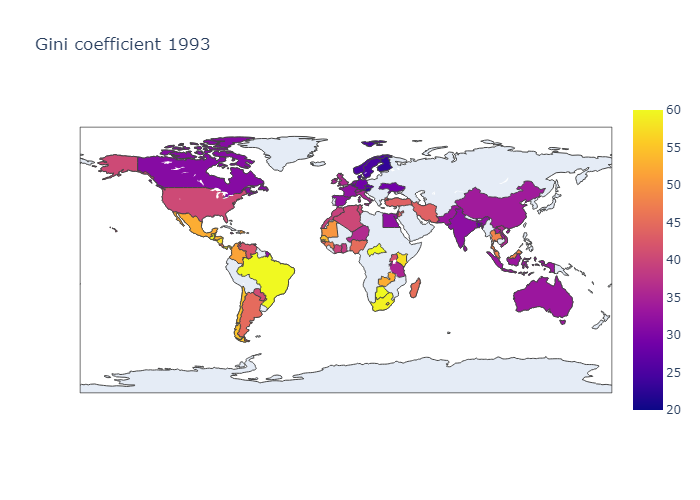

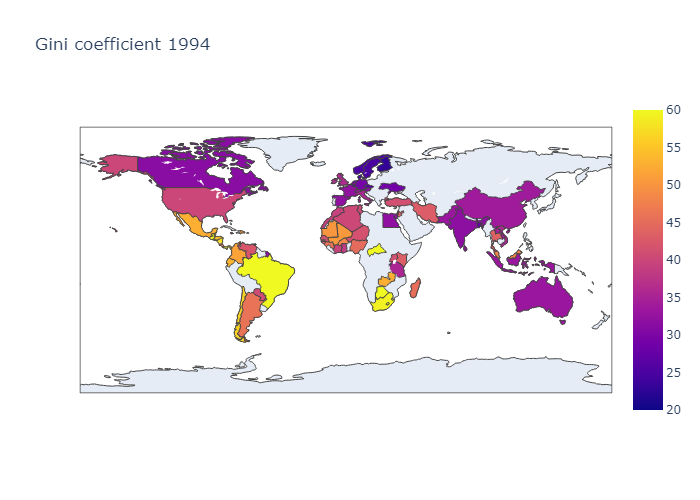

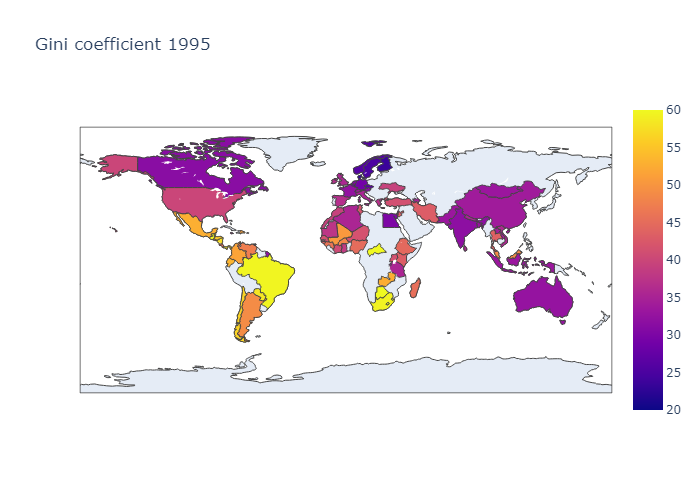

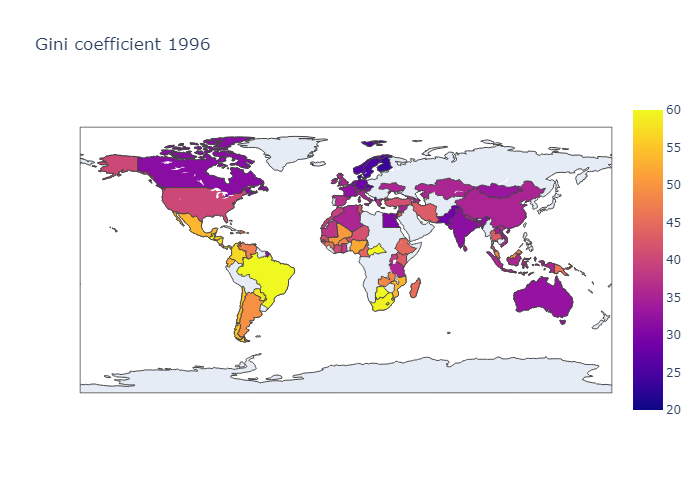

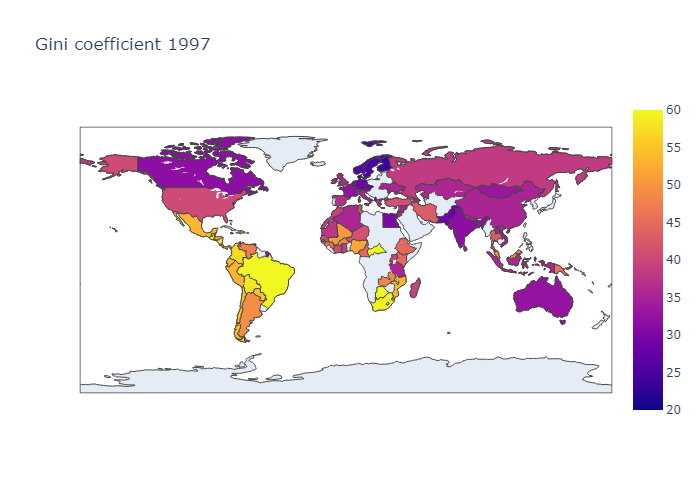

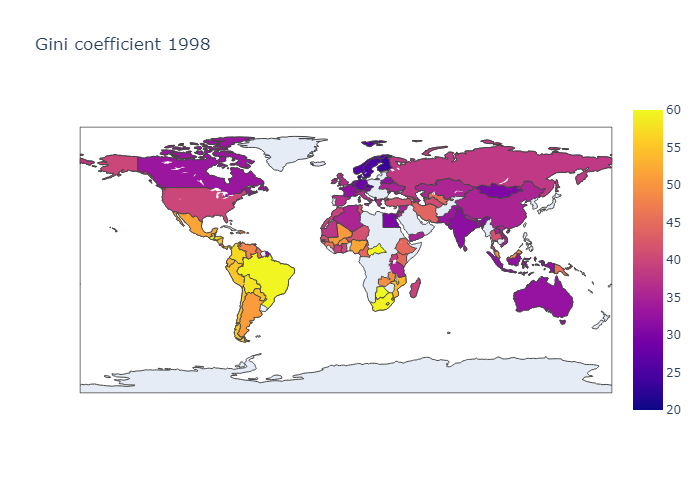

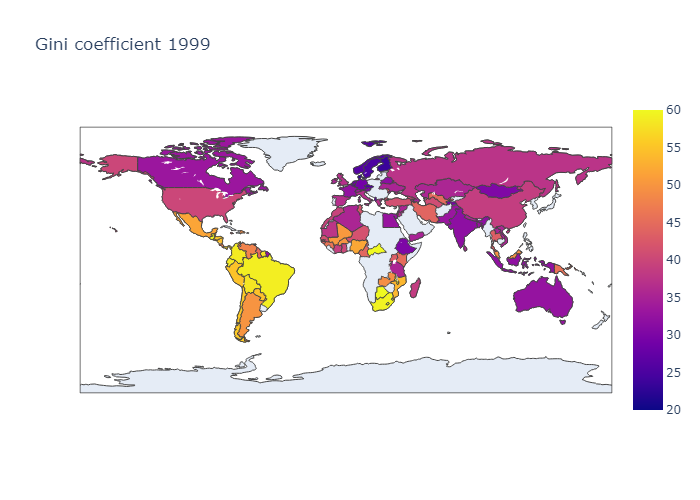

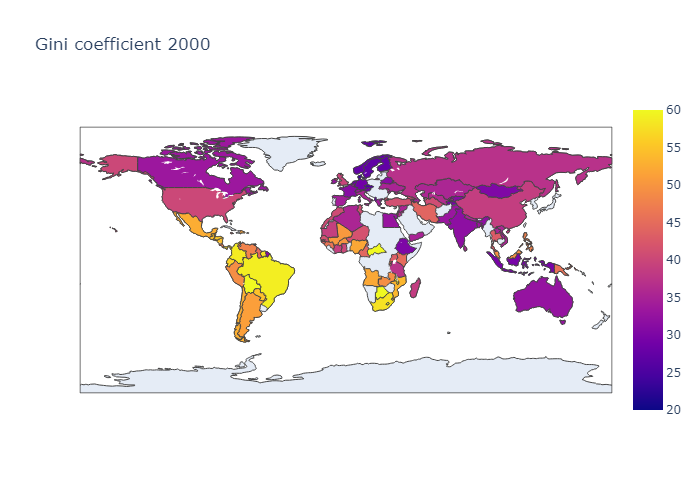

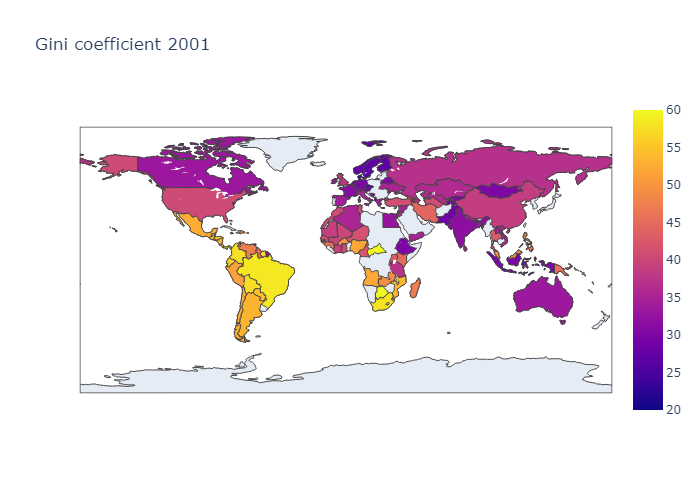

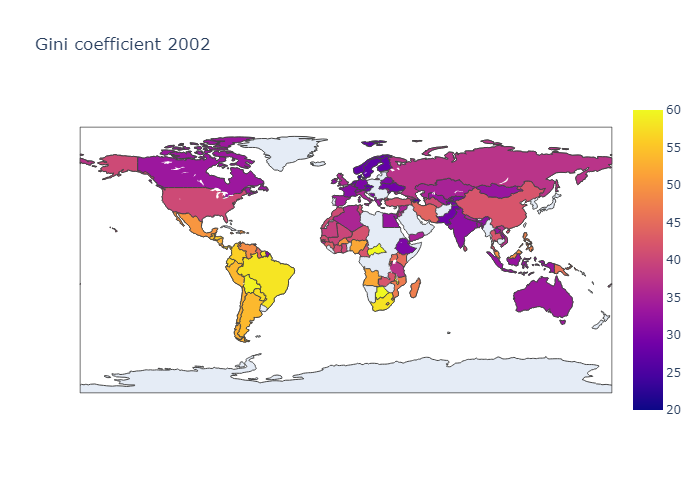

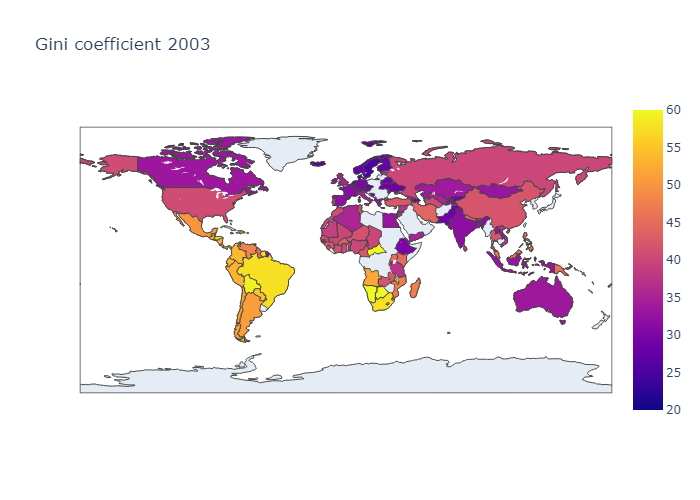

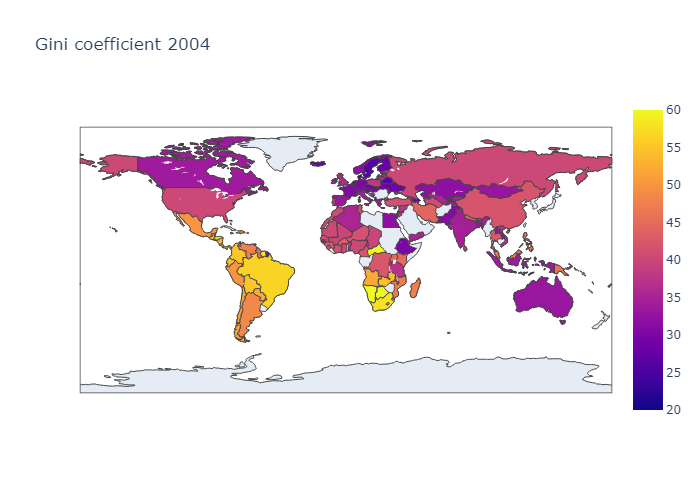

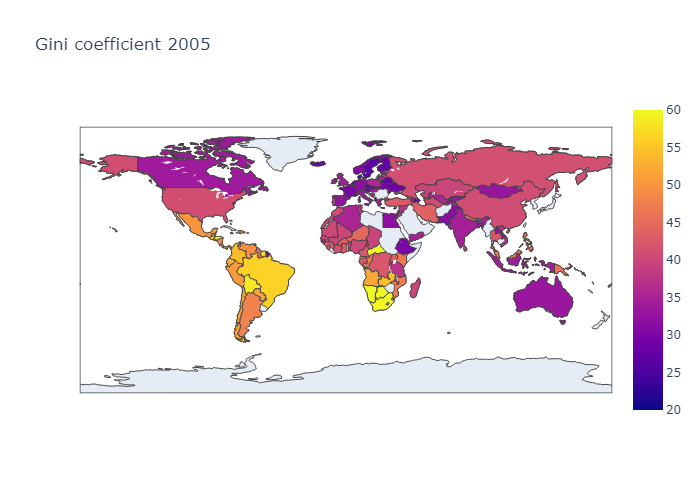

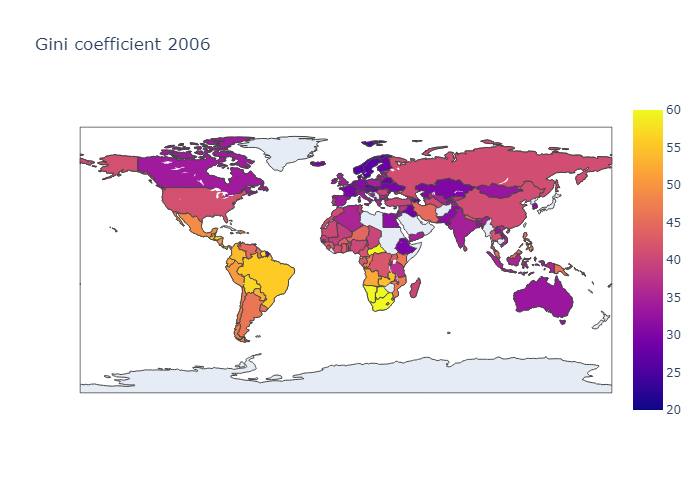

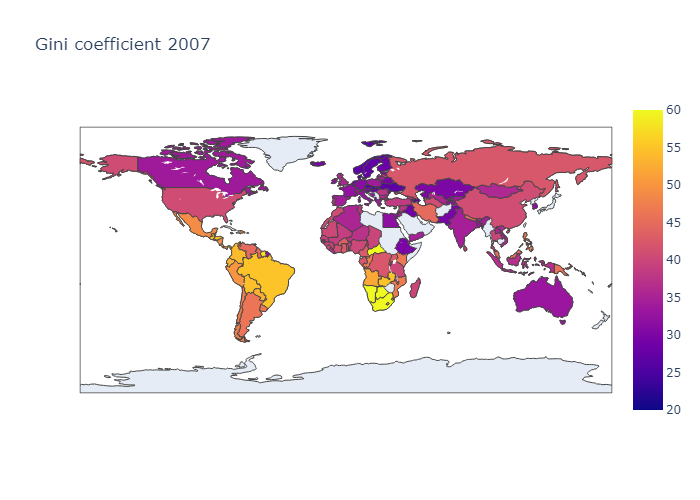

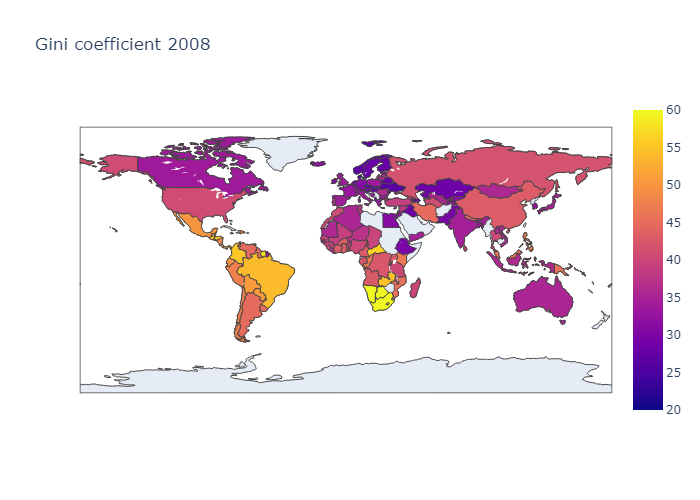

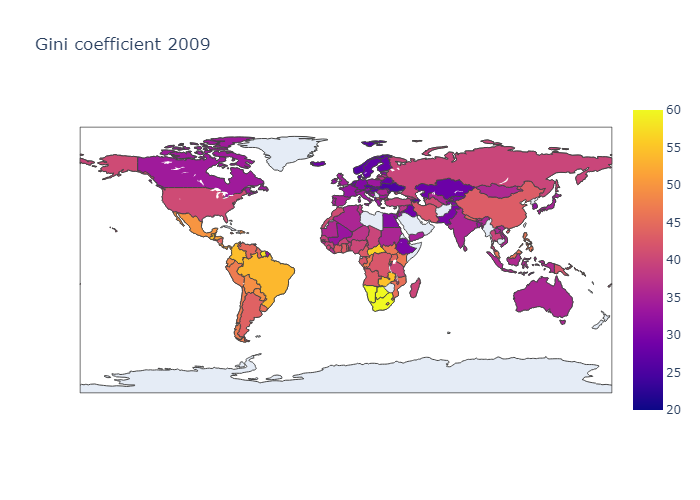

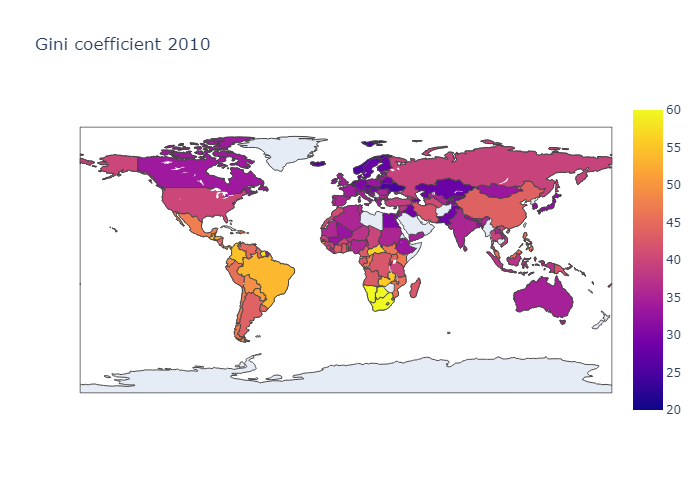

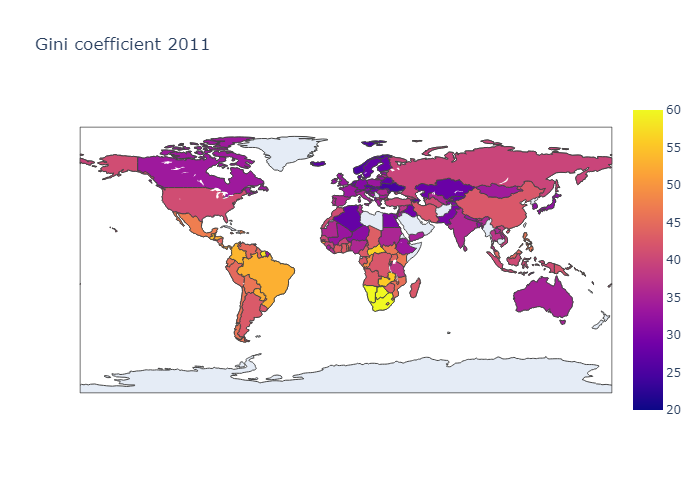

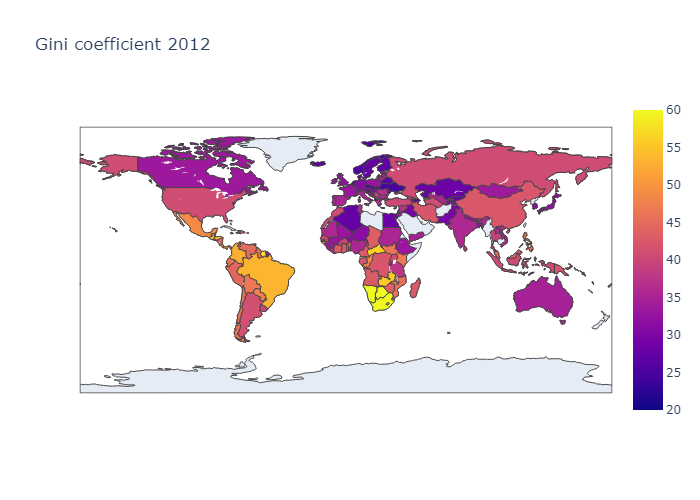

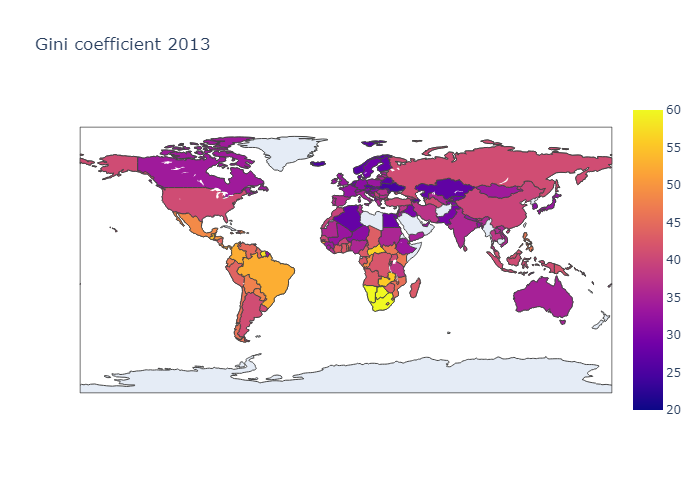

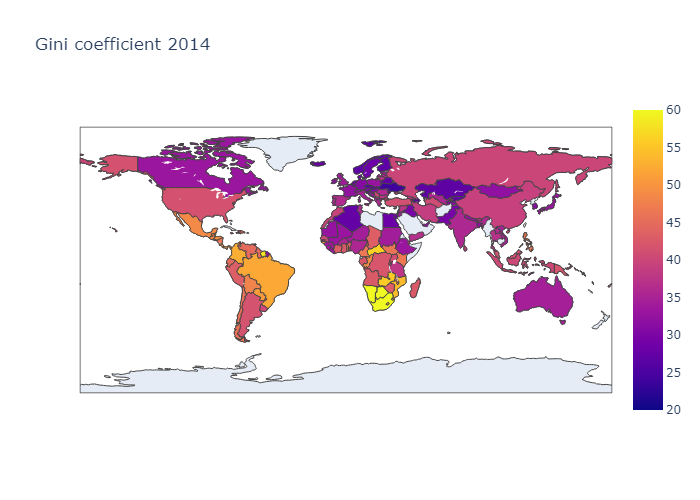

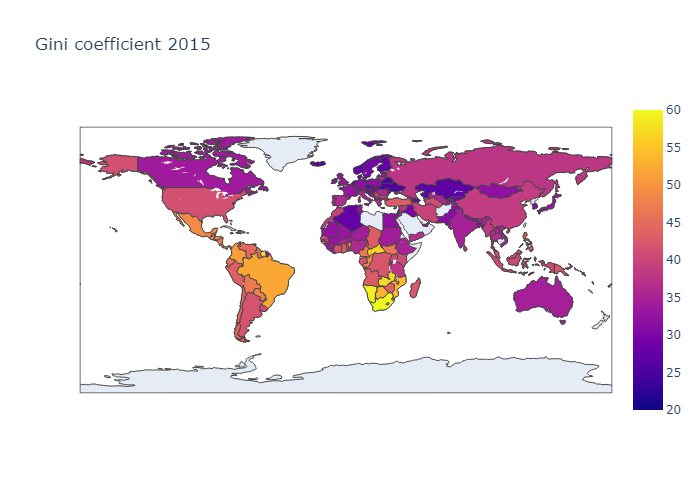

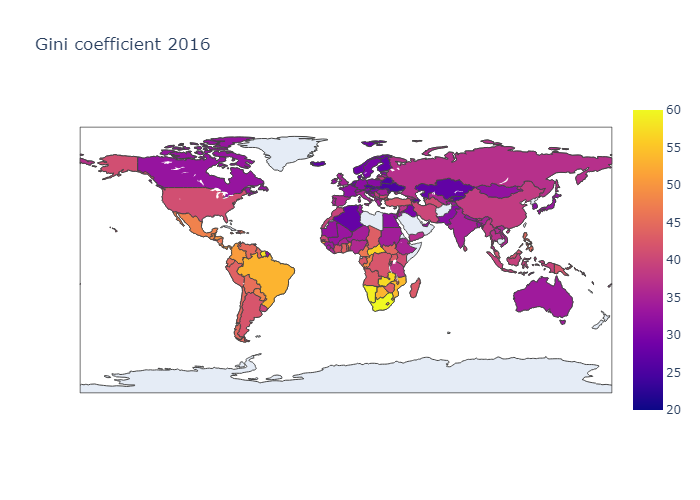

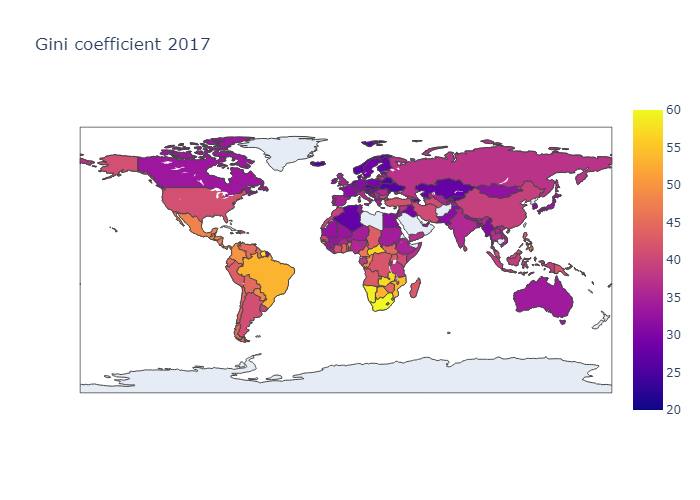

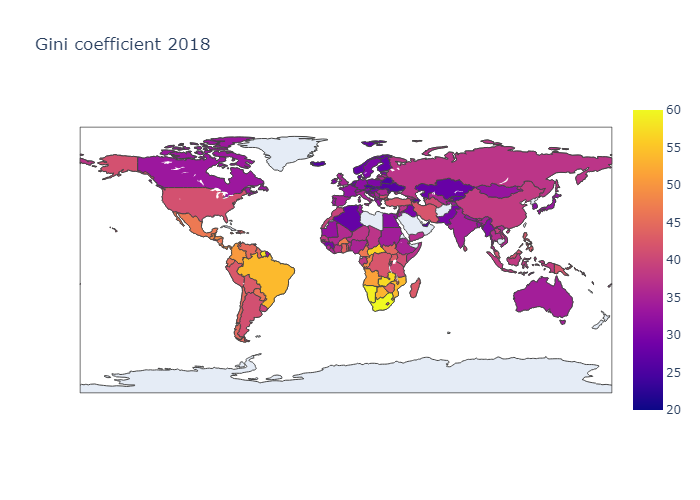

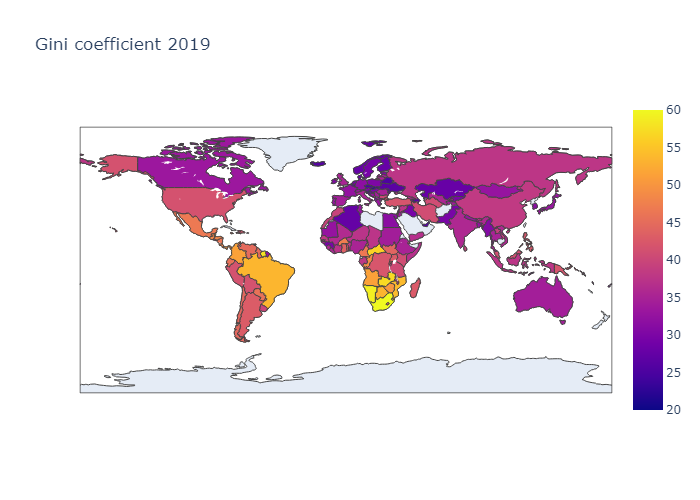

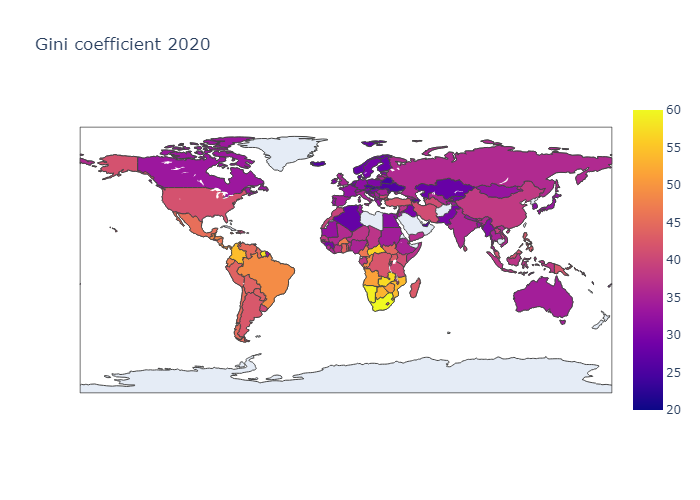

In [95]:
import plotly.graph_objs as go
import plotly.io as pio
import imageio

# Set the default renderer to PNG
pio.renderers.default = "png"

# Create a list to hold the filenames of the saved PNG files
png_files = []

# Loop through the columns of the dataframe
for i in range(len(df.columns)):
    # Create the choropleth visualization
    map_data = dict(type='choropleth', locations=df['Country Code'], z=df[df.columns[i]], text=df['country '], zmin=20,
    zmax=60)
    map_layout = dict(title=df.columns[i], geo=dict(showframe=True))
    map_actual = go.Figure(data=[map_data], layout=map_layout)
    
    #map_data = dict(type='choropleth', locations=dff['Country Code'], z=df[df.columns[i]], text=dff['country '], colorbar={'title': df.columns[i]})
    #map_layout = dict( title='Абсолютное расхождение', geo=dict(showframe=True) )
    #map_actual = go.Figure(data=[map_data], layout=map_layout)
    iplot(map_actual)
    
    # Save the visualization as a PNG file
    filename = f"plot_{df.columns[i]}.png"
    png_files.append(filename)
    pio.write_image(map_actual, filename)

# Set the output filename for the GIF
gif_filename = "output.gif"

# Create the GIF using the saved PNG files
images = []
for filename in png_files:
    images.append(imageio.imread(filename))
    
imageio.mimsave(gif_filename, images, duration=0.2)


In [94]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
from moviepy.editor import VideoFileClip

clip = VideoFileClip("output.gif")
clip = clip.subclip(3)
clip = clip.subclip(0, clip.duration - 2)
clip.write_gif("trimmed_example.gif")


MoviePy - Building file trimmed_example.gif with imageio.


In [93]:
df

Country Code                        country   \
0            AFG                     Afghanistan   
3            ALB                         Albania   
4            DZA                         Algeria   
5            ASM                  American Samoa   
6            AND                         Andorra   
7            AGO                          Angola   
8            ATG             Antigua and Barbuda   
10           ARG                       Argentina   
11           ARM                         Armenia   
12           ABW                           Aruba   
13           AUS                       Australia   
14           AUT                         Austria   
15           AZE                      Azerbaijan   
16           BHS                    Bahamas, The   
17           BHR                         Bahrain   
18           BGD                      Bangladesh   
19           BRB                        Barbados   
20           BLR                         Belarus   
21           BEL                         Belgium   
22           BLZ                          Belize   
23           BEN                           Benin   
24           BMU                         Bermuda   
25           BTN                          Bhutan   
26           BOL                         Bolivia   
27           BIH          Bosnia and Herzegovina   
28           BWA                        Botswana   
29           BRA                          Brazil   
30           VGB          British Virgin Islands   
31           BRN               Brunei Darussalam   
32           BGR                        Bulgaria   
33           BFA                    Burkina Faso   
34           BDI                         Burundi   
35           CPV                      Cabo Verde   
36           KHM                        Cambodia   
37           CMR                        Cameroon   
38           CAN                          Canada   
40           CYM                  Cayman Islands   
41           CAF        Central African Republic   
43           TCD                            Chad   
45           CHL                           Chile   
46           CHN                           China   
47           COL                        Colombia   
48           COM                         Comoros   
49           COD                Congo, Dem. Rep.   
50           COG                     Congo, Rep.   
51           CRI                      Costa Rica   
52           CIV                   Cote d'Ivoire   
53           HRV                         Croatia   
54           CUB                            Cuba   
55           CUW                         Curacao   
56           CYP                          Cyprus   
57           CZE                         Czechia   
58           DNK                         Denmark   
59           DJI                        Djibouti   
60           DMA                        Dominica   
61           DOM              Dominican Republic   
66           ECU                         Ecuador   
67           EGY                Egypt, Arab Rep.   
68           SLV                     El Salvador   
69           GNQ               Equatorial Guinea   
70           ERI                         Eritrea   
71           EST                         Estonia   
72           SWZ                        Eswatini   
73           ETH                        Ethiopia   
79           FRO                   Faroe Islands   
80           FJI                            Fiji   
81           FIN                         Finland   
83           FRA                          France   
84           PYF                French Polynesia   
85           GAB                           Gabon   
86           GMB                     Gambia, The   
87           GEO                         Georgia   
88           DEU                         Germany   
89           GHA                           Ghana   
90           GIB                       Gibraltar   
91           GRC                          Greece   
